**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [162]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import cv2
import glob
import random

from skimage.feature import hog
from scipy.ndimage.measurements import label
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline

In [163]:
cars = glob.glob('vehicles/*/*.png')
print("Cars = " + str(len(cars)))

Cars = 8792


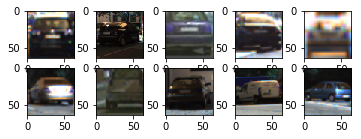

In [164]:
# Set up plot
for i in range(10):
    index = random.randint(0, len(cars))
    img = cv2.imread(cars[index])
    plt.subplot(4,5,i+1)
    plt.imshow(img)

In [165]:
non_cars = glob.glob('non-vehicles/*/*.png')
print("Non Vehicles = " + str(len(non_cars)))

Non Vehicles = 8968


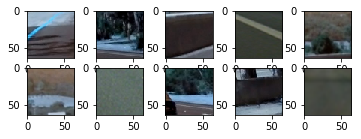

In [166]:
# Set up plot
for i in range(10):
    index = random.randint(0, len(non_cars))
    img = cv2.imread(non_cars[index])
    plt.subplot(4,5,i+1)
    plt.imshow(img)

In [167]:
params = dict()
params['nbins'] = 48
params['bins_range'] = (0, 256)
params['resize_image_size'] = (16, 16)
params['orient'] = 8
params['pixels_per_cell'] = 8
params['cells_per_block'] = 2

In [168]:
def color_hist(image, nbins=32, bins_range=(0, 256)):
    channel1_hist = np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features

In [169]:
# Define a function to compute color histogram features  
def color_hist_img(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

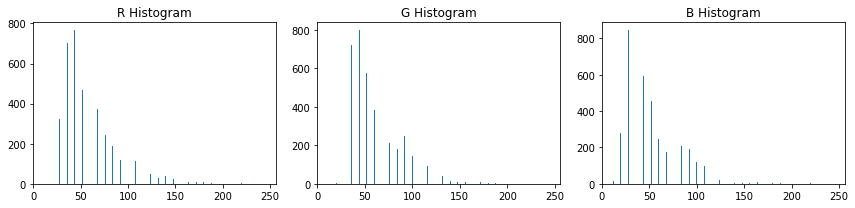

In [170]:
image = cv2.imread(cars[300])

rh, gh, bh, bincen, feature_vec = color_hist_img(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

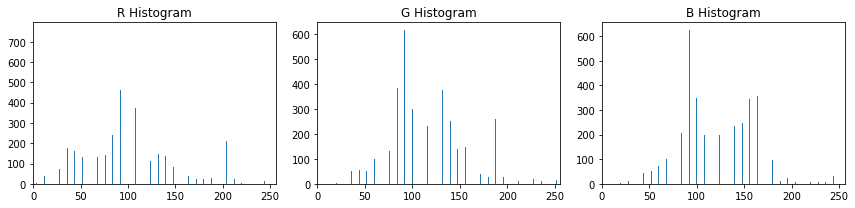

In [171]:
image = cv2.imread(non_cars[300])

rh, gh, bh, bincen, feature_vec = color_hist_img(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

In [172]:
def bin_spatial(image, size=(32, 32)):
    features = cv2.resize(image, size).ravel()
    return features

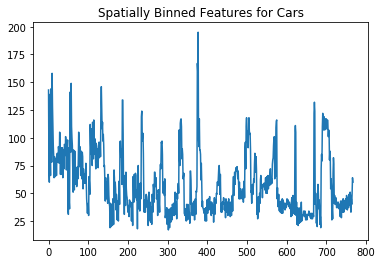

In [173]:
image = cv2.imread(cars[300])
feature_vec = bin_spatial(image, size=params['resize_image_size'])

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features for Cars')

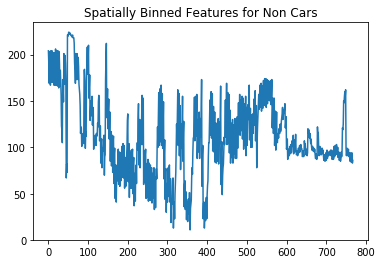

In [174]:
image = cv2.imread(non_cars[300])
feature_vec = bin_spatial(image, size=params['resize_image_size'])

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features for Non Cars')

In [175]:
def get_hog_features(image, orient, pix_per_cell, cell_per_block,vis=False):
    hog_features = []
    for color_channel in range(image.shape[2]):
        channel_features = get_img_hog_features(image[:,:,color_channel], orient=orient, 
                                                pix_per_cell=pix_per_cell,cell_per_block=cell_per_block,vis=False, feature_vec=True)
        hog_features.append(channel_features)
    hog_features = np.ravel(hog_features)    
    return hog_features

In [176]:
def get_img_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

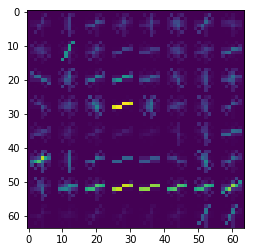

In [177]:
img = cv2.imread(cars[0])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#print(img)
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
features, hog_image = get_img_hog_features(img, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
plt.imshow(hog_image)

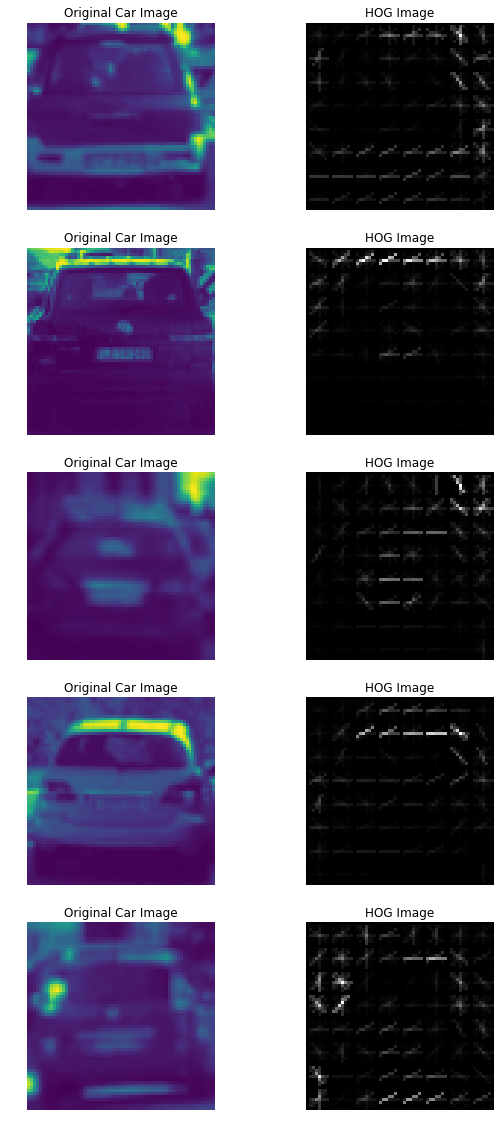

In [178]:
# Set up plot
fig, axs = plt.subplots(5,2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i=0

for j in range(5):
    index = random.randint(0, len(cars))
    img = cv2.imread(cars[index])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features,hog_image = get_img_hog_features(img, params['orient'], 
                        params['pixels_per_cell'], params['cells_per_block'], 
                        vis=True, feature_vec=False)   
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('Original Car Image')
    i += 1
    axs[i].imshow(hog_image, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('HOG Image')
    i += 1

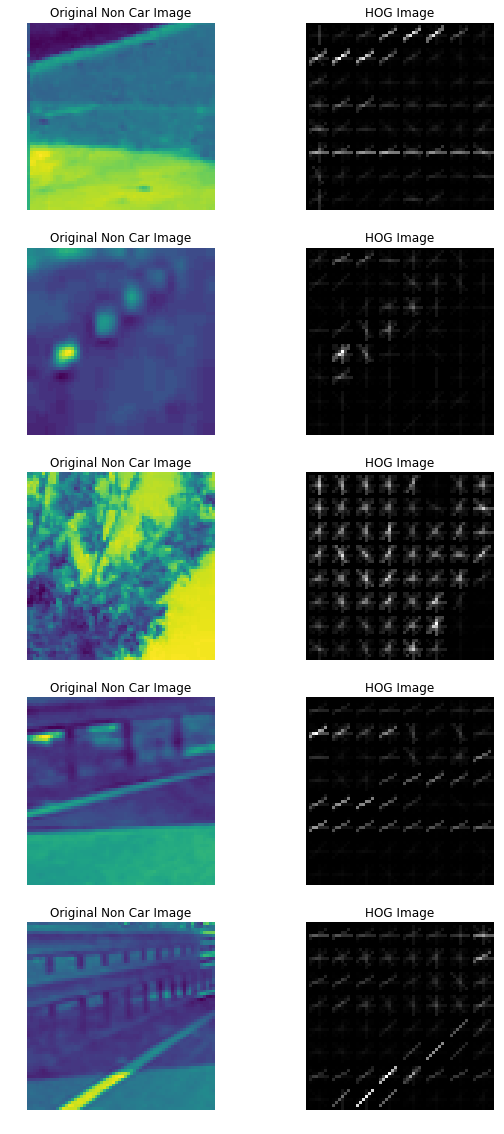

In [179]:
# Set up plot
fig, axs = plt.subplots(5,2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i=0

for j in range(5):
    index = random.randint(0, len(non_cars))
    img = cv2.imread(non_cars[index])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features,hog_image = get_img_hog_features(img, params['orient'], 
                        params['pixels_per_cell'], params['cells_per_block'], 
                        vis=True, feature_vec=False)   
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('Original Non Car Image')
    i += 1
    axs[i].imshow(hog_image, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('HOG Image')
    i += 1

In [58]:
def extract_features(images, params):
    features = []
    for img_path in images:
        image = mpimg.imread(img_path)
        spatial_features = bin_spatial(image, size=params['resize_image_size'])
        hist_features = color_hist(image, nbins=params['nbins'], bins_range=params['bins_range'])
        hog_features = get_hog_features(image, params['orient'], params['pixels_per_cell'], params['cells_per_block'])
        features.append(np.concatenate((spatial_features, hist_features,hog_features)))
    return features

In [59]:
def single_img_features(image, params):
    spatial_features = bin_spatial(image, size=params['resize_image_size'])
    hist_features = color_hist(image, nbins=params['nbins'], bins_range=params['bins_range'])
    hog_features = get_hog_features(image, params['orient'], params['pixels_per_cell'], params['cells_per_block'])
    return np.concatenate((spatial_features, hist_features,hog_features))

In [60]:
car_features = extract_features(cars, params)
non_car_features = extract_features(non_cars, params)

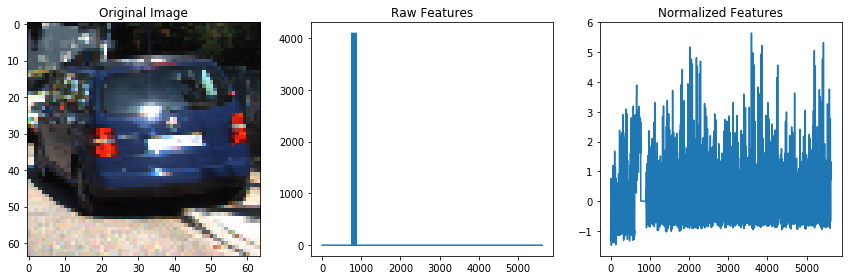

In [181]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, non_car_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()

In [61]:
def create_train_test_set(car_features, non_car_features):
    X = np.vstack((np.array(car_features), np.array(non_car_features))).astype(np.float64)                        
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    Y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=1234)
    
    return X_train, Y_train, X_test, Y_test, X_scaler

In [107]:
X_train, Y_train, X_test, Y_test, X_scaler = create_train_test_set(car_features, non_car_features)

In [108]:
def train_test_svm(X_train, Y_train, X_test, Y_test):
    svc = SVC(C=1.0, probability=True)
    svc.fit(X_train, Y_train)
    
    print("Accuracy of classifier - {:.4f}".format(svc.score(X_test, Y_test)))
    return svc

In [109]:
clf = train_test_svm(X_train, Y_train, X_test, Y_test)

Accuracy of classifier - 0.9955


In [110]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [111]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    
    window_list = []
    
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            window_list.append(((startx, starty), (endx, endy)))
    
    return window_list

In [128]:
def search_windows(img, windows, clf, scaler, params):
    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        features = single_img_features(test_img, params)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        prediction = clf.predict(test_features)
        #print(prediction)
        if prediction > 0.99:
            on_windows.append(window)
    return on_windows

In [130]:
def test_windows(image, clf, scaler, params):    
    
    image_copy = np.copy(img)
    image = image.astype(np.float32)/255
    
    #windows1 = slide_window(image, x_start_stop=[640, 1280], y_start_stop=[300, 450], 
      #          xy_window=(64, 64), xy_overlap=(0.6, 0.6))
    
    windows2 = slide_window(image, x_start_stop=[640, 1280], y_start_stop=[300, 500], 
                xy_window=(96, 96), xy_overlap=(0.8, 0.8))
    
    windows3 = slide_window(image, x_start_stop=[640, 1280], y_start_stop=[400, 550], 
                xy_window=(128, 128), xy_overlap=(0.85, 0.85))

    windows =  windows2 + windows3
    
    hot_windows = search_windows(image, windows, clf, scaler, params)                       

    window_img = draw_boxes(image_copy, hot_windows, color=(0, 0, 255), thick=6) 
    
    return window_img

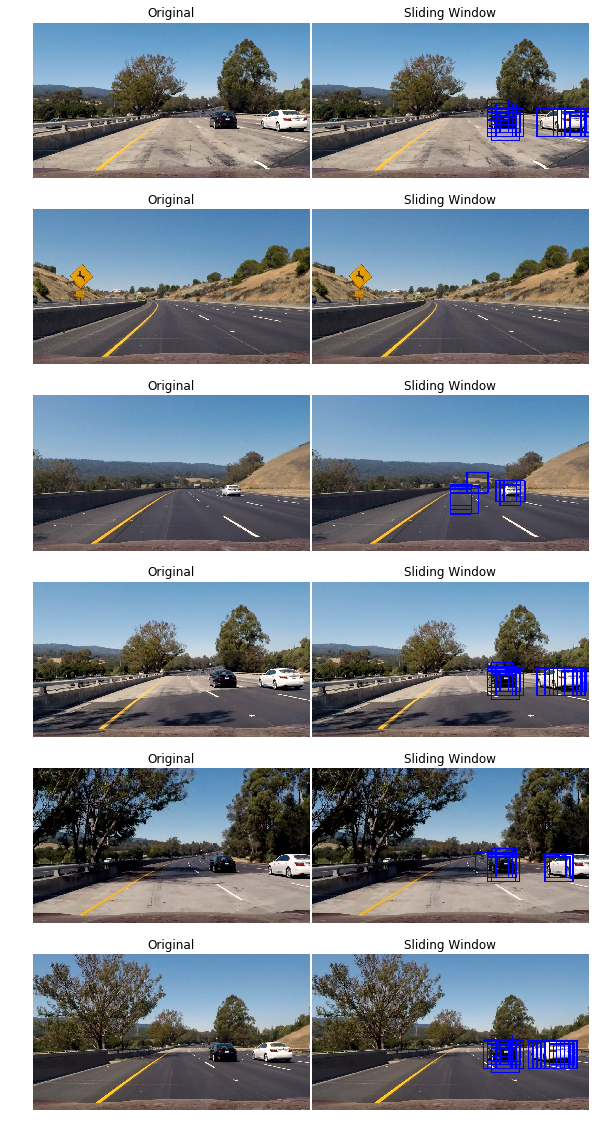

In [131]:
images = glob.glob('test_images/*')
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i=0
for image_path in images:
    img = mpimg.imread(image_path)
    res_img = test_windows(img,clf, X_scaler, params)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('Original')
    i += 1
    axs[i].imshow(res_img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('Sliding Window')
    i += 1

In [132]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [145]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, clf, X_scaler, params):
    
   
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // params['pixels_per_cell']) - params['cells_per_block'] + 1
    nyblocks = (ch1.shape[0] // params['pixels_per_cell']) - params['cells_per_block'] + 1 
    nfeat_per_block = params['orient']*params['cells_per_block']**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // params['pixels_per_cell']) - params['cells_per_block'] + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, 8, 8, 2)
    hog2 = get_hog_features(ch2, 8, 8, 2)
    hog3 = get_hog_features(ch3, 8, 8, 2)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=params['resize_image_size'])
            hist_features = color_hist(subimg, nbins=params['nbins'])

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = clf.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img

In [139]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

In [140]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [141]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [182]:
def test_heat_map(image, clf, scaler, params):    
    
    image_copy = np.copy(img)
    image = image.astype(np.float32)/255
    
    #windows1 = slide_window(image, x_start_stop=[640, 1280], y_start_stop=[300, 450], 
      #          xy_window=(64, 64), xy_overlap=(0.6, 0.6))
    
    windows2 = slide_window(image, x_start_stop=[800, 1250], y_start_stop=[350, 500], 
                xy_window=(96, 96), xy_overlap=(0.8, 0.8))
    
    windows3 = slide_window(image, x_start_stop=[800, 1250], y_start_stop=[350, 550], 
                xy_window=(128, 128), xy_overlap=(0.85, 0.85))

    windows =  windows2 + windows3
    
    hot_windows = search_windows(image, windows, clf, scaler, params)                       

    window_img = draw_boxes(image_copy, hot_windows, color=(0, 0, 255), thick=6) 
    
    heat_image = np.zeros_like(image[:,:,0]).astype(np.float)

    add_heat(heat_image, hot_windows)
        
    heat_image = apply_threshold(heat_image, 2)
    # Visualize the heatmap when displaying    
    heatmaps = np.clip(heat_image, 0, 255)

    labels = label(heatmaps)
    
    final_image = draw_labeled_bboxes(np.copy(image_copy), labels)
    return final_image,heatmaps

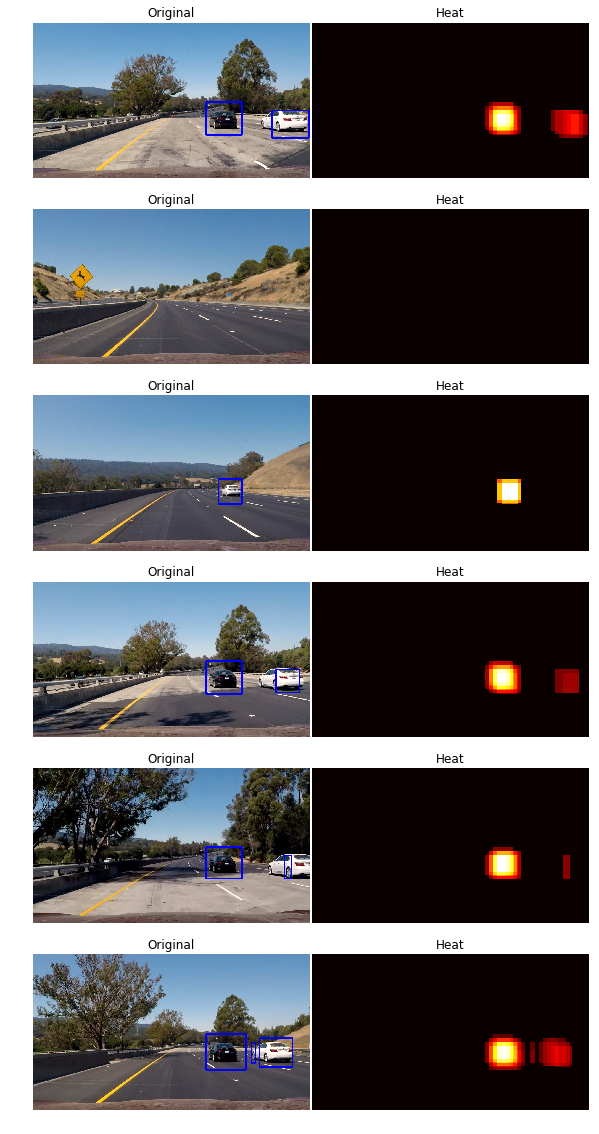

In [183]:
images = glob.glob('test_images/*')
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i=0
for image_path in images:
    img = mpimg.imread(image_path)
    res_img,heatmaps = test_heat_map(img,clf, X_scaler, params)
    axs[i].imshow(res_img)
    axs[i].axis('off')
    axs[i].set_title('Original')
    i += 1
    axs[i].imshow(heatmaps, cmap='hot')
    axs[i].axis('off')
    axs[i].set_title('Heat')
    i += 1

In [184]:
def pipeline(image, flag=False):
    global prev_frame_heat
    
    image_copy = np.copy(image)
    image = image.astype(np.float32)/255
    
       
    windows2 = slide_window(image, x_start_stop=[800, 1250], y_start_stop=[350, 500], 
                xy_window=(96, 96), xy_overlap=(0.8, 0.8))
    
    windows3 = slide_window(image, x_start_stop=[800, 1250], y_start_stop=[400, 550], 
                xy_window=(128, 128), xy_overlap=(0.85, 0.85))

    windows =  windows2 + windows3 

    hot_windows = search_windows(image, windows, clf, X_scaler, params)                  

    heat_image = np.zeros_like(image[:,:,0]).astype(np.float)

    add_heat(heat_image, hot_windows)
    
    if not flag:
        if prev_frame_heat == None:
            prev_frame_heat = heat_image
        else:
            heat_image = (prev_frame_heat * 0.2) + (heat_image * 0.8)
            prev_frame_heat = heat_image
        
    heatmaps = apply_threshold(heat_image, 2)
    labels = label(heatmaps)
    
    final_image = draw_labeled_bboxes(np.copy(image_copy), labels)
    return final_image

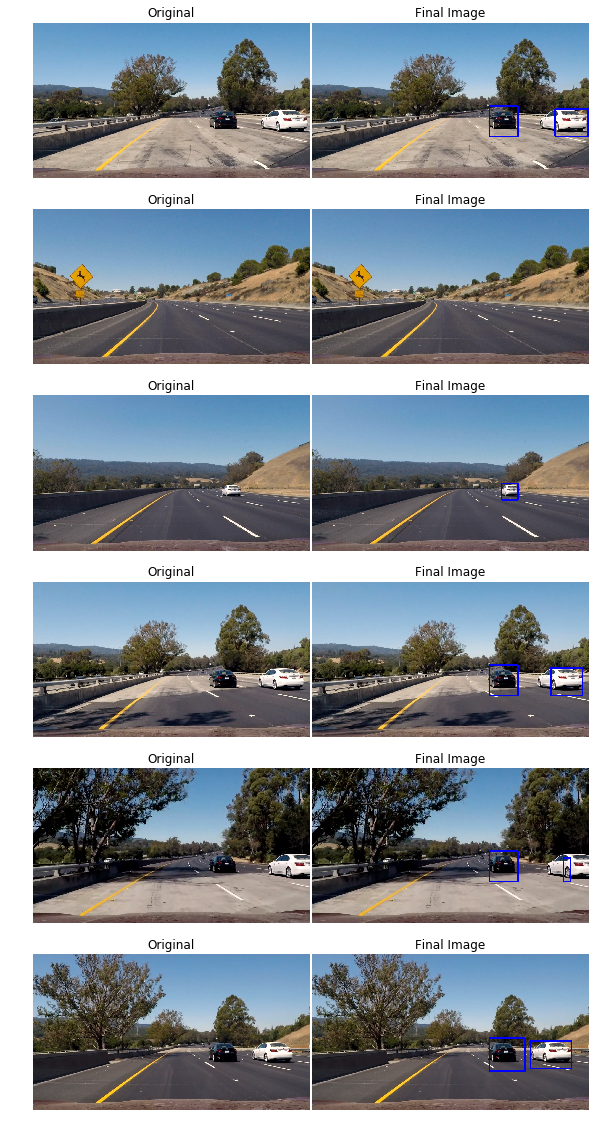

In [185]:
images = glob.glob('test_images/*')
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
i=0
for image_path in images:
    img = mpimg.imread(image_path)
    res_img = pipeline(img, flag=True)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('Original')
    i += 1
    axs[i].imshow(res_img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('Final Image')
    i += 1

In [160]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [187]:
def process_image(image):
    result = pipeline(image)
    return result

In [191]:
prev_frame_heat = None
output_clip = 'project_video_final_result.mp4'
input_clip = VideoFileClip("project_video.mp4")
clip = input_clip.fl_image(process_image)
%time clip.write_videofile(output_clip, audio=False)

[MoviePy] >>>> Building video project_video_final_result.mp4
[MoviePy] Writing video project_video_final_result.mp4


100%|███████████████████████████████████▉| 1260/1261 [2:32:23<00:07,  7.31s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_final_result.mp4 

Wall time: 2h 32min 25s
